In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from glob import glob
import pickle
from os import chdir 
import seaborn as sns
%matplotlib inline

In [2]:
# glob('results/experiments_results/*')
models = ['catboost', 'ours', 'sklearn','xgboost']

In [3]:
import ast
catboost = pd.concat([pd.read_csv(path) for path in glob(f"results_sigma_10/experiments_results/catboost/*.csv")])
ours = pd.concat([pd.read_csv(path) for path in glob(f"results_sigma_10/experiments_results/ours/*.csv")])
sklearn = pd.concat([pd.read_csv(path) for path in glob(f"results_sigma_10/experiments_results/sklearn/*.csv")])
xgboost = pd.concat([pd.read_csv(path) for path in glob(f"results_sigma_10/experiments_results/xgboost/*.csv")])

In [4]:
df = pd.concat([catboost, ours, sklearn, xgboost])
df = df[df.columns[1:]]
df.loc[:,['gain','permutation_train','permutation_test','shap_test']] = 1 - df.loc[:,['gain','permutation_train','permutation_test','shap_test']]
df = df.groupby(['model','categories']).mean().reset_index().drop(columns = ['exp'])
df.head(2)

,model,categories,gain,permutation_train,permutation_test,shap_train,shap_test
0,catboost_mean_imputing,2,0.066533,0.054356,0.009758,0.923524,0.078350
1,catboost_mean_imputing,4,0.096411,0.078488,-0.024155,0.902449,0.100379


# Experiment

$$y =  A_1 \cdot X_1 + A_2 \cdot X_2 + \sigma$$
$$A)1 = 3, A_2 = 2, \sigma \rightarrow N(0,10)$$
## 15 experiments

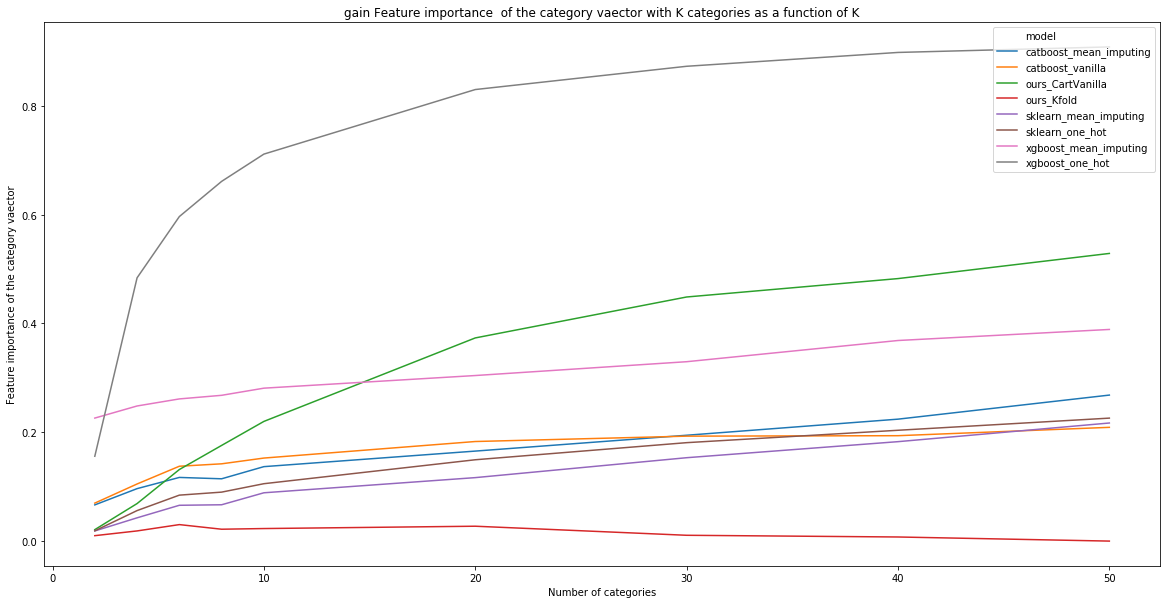

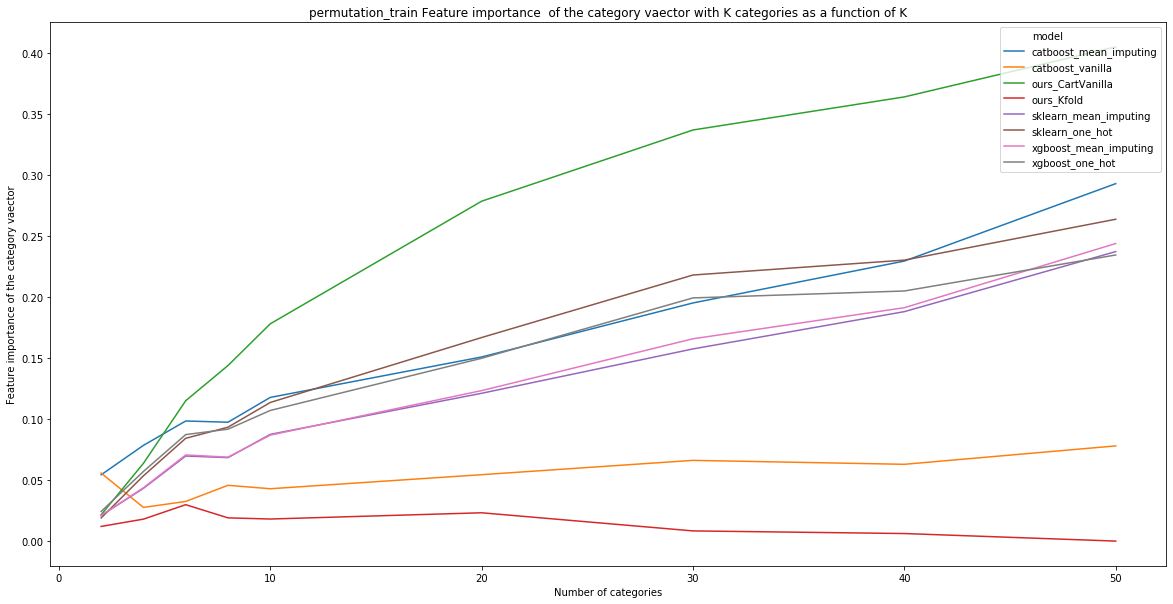

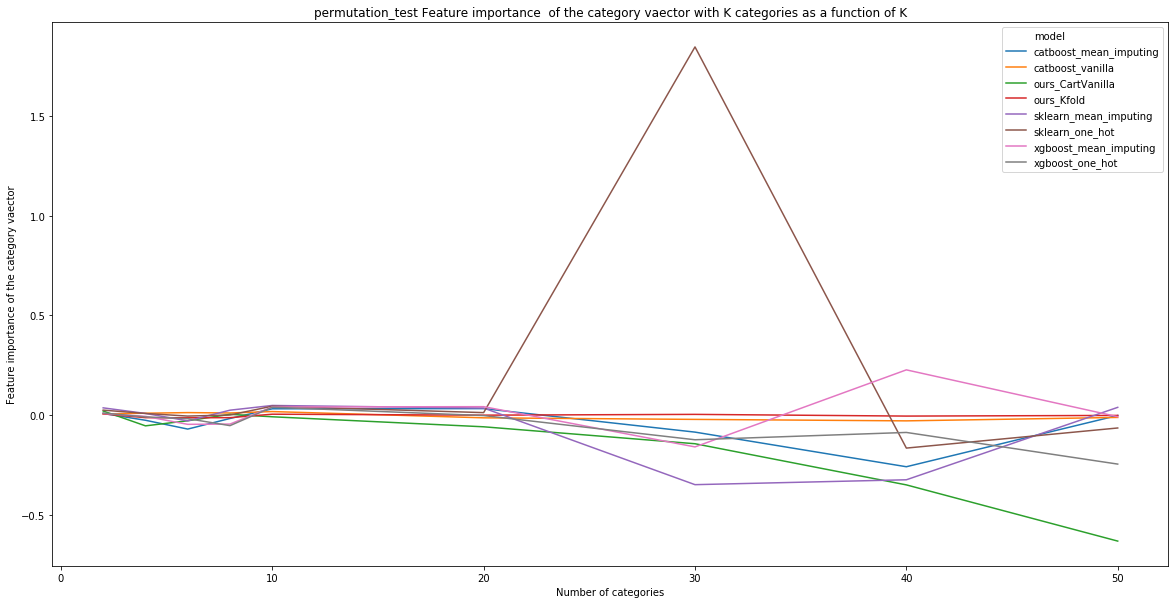

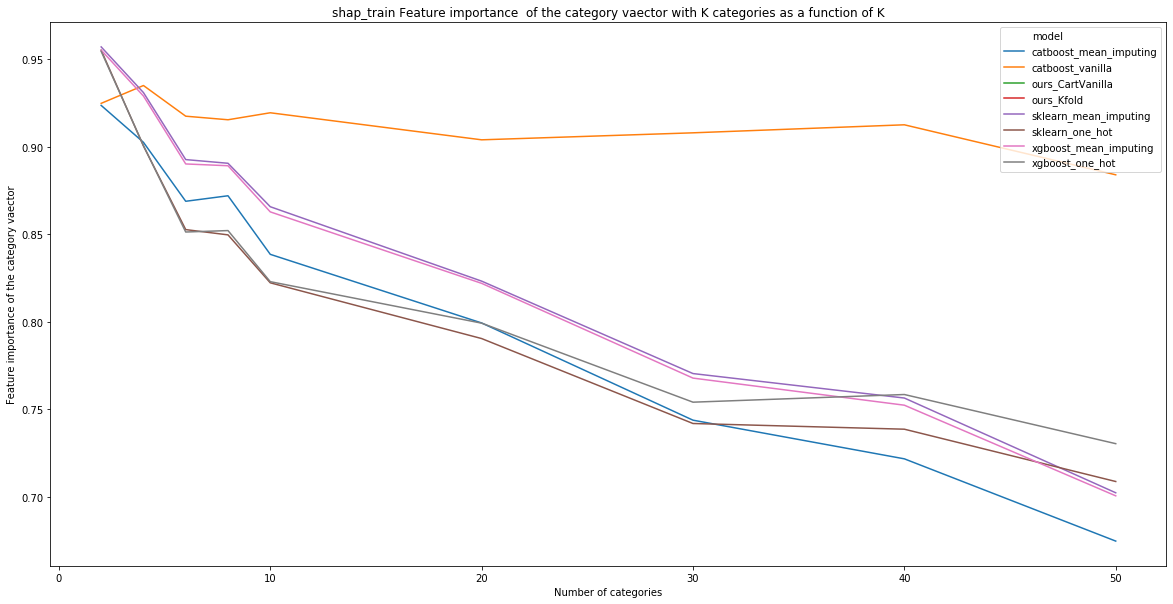

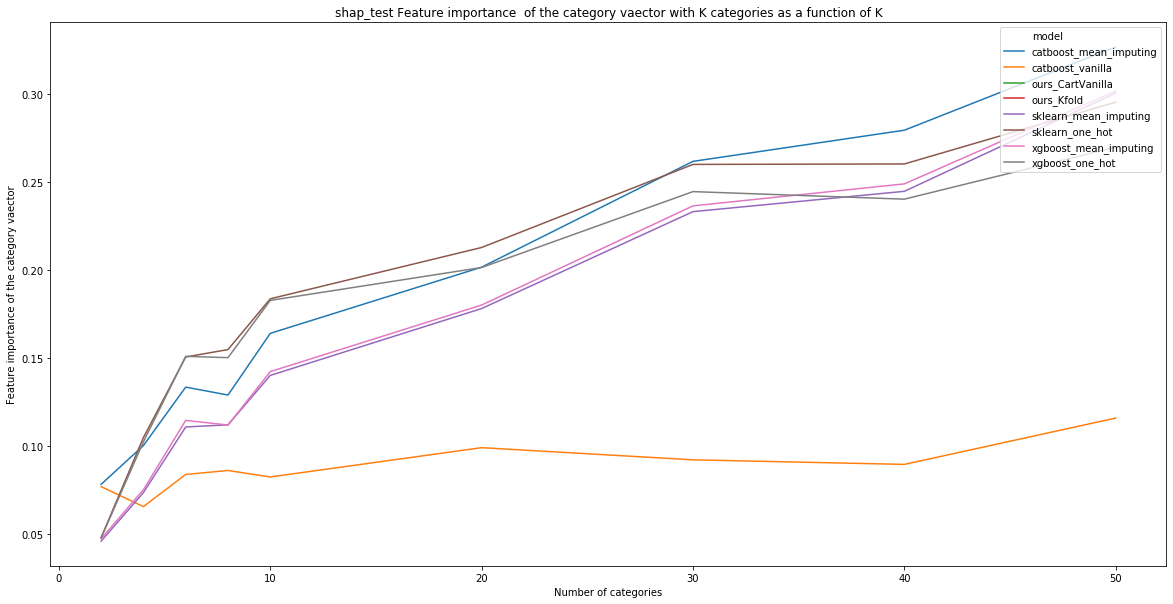

In [5]:
for fi in df.columns[2:]:
    plot_df = df[['model','categories', fi]]
    plt.rcParams['figure.figsize'] = [20, 10]
    ax = sns.lineplot(x = 'categories', y = fi, hue = 'model', data = plot_df)
    ax.set_xlabel("Number of categories")
    ax.set_ylabel("Feature importance of the category vaector")
    ax.set_title(F"{fi} Feature importance  of the category vaector with K categories as a function of K")
    plt.legend(loc='upper right')
    plt.show()
    